In [1]:
import pandas as pd
import wrangle
import new_wrangle
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")
from sklearn.preprocessing import MinMaxScaler, RobustScaler, StandardScaler

# acquire data

In [2]:
# use function to acquire data
df1= wrangle.acquire_data()

In [3]:
#check  info
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6435 entries, 0 to 6434
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
 8   Type          6435 non-null   object 
 9   Size          6435 non-null   int64  
dtypes: float64(5), int64(3), object(2)
memory usage: 553.0+ KB


In [4]:
df1.shape

(6435, 10)

# Ouliers store_size

We are exploring the store_type vs store_size, we notice that there are outliers

<AxesSubplot:xlabel='Type', ylabel='Size'>

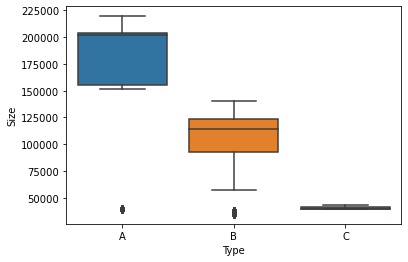

In [5]:
sns.boxplot(x= df1['Type'], y= df1['Size'])

(0.0, 46000.0)

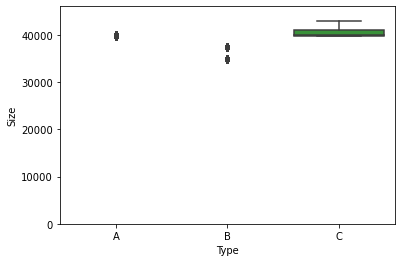

In [6]:
#check only the outliers
sns.boxplot(x= df1['Type'], y= df1['Size'])
plt.ylim(0,46000)

we can see there are outliers for B and A and we decided to change those to  store type C

In [7]:
#getting a df that has all store_size < 50000 and df.store_type != "C"
df3 = df1 [(df1.Size < 50000) & (df1.Type != "C")]

In [8]:
#lets see which stores type A  are df.store_size < 50000
df3[df3.Type == "A"].groupby('Store').count()

,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Type,Size
Store,,,,,,,,,
33,143,143,143,143,143,143,143,143,143
36,143,143,143,143,143,143,143,143,143


In [9]:
#lets see which stores type A  are df.store_size < 50000
df3[df3.Type == "B"].groupby('Store').count()

,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Type,Size
Store,,,,,,,,,
3,143,143,143,143,143,143,143,143,143
5,143,143,143,143,143,143,143,143,143


In [10]:
# I gave the sote Id to Natasha so she is going to change the type.

# Wrangle

In [11]:
#using the funcion wrangle
df= new_wrangle.wrangle_walmart()

Note: this function gives us  new columns and rename columns

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6435 entries, 2010-02-05 to 2012-10-26
Data columns (total 29 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   store_id            6435 non-null   object 
 1   weekly_sales        6435 non-null   float64
 2   holiday_flag        6435 non-null   int64  
 3   temperature         6435 non-null   int64  
 4   fuel_price          6435 non-null   float64
 5   CPI                 6435 non-null   float64
 6   unemployment        6435 non-null   float64
 7   store_type          6435 non-null   object 
 8   store_size          6435 non-null   int64  
 9   month               6435 non-null   object 
 10  year                6435 non-null   int64  
 11  quarter             6435 non-null   int64  
 12  weekday             6435 non-null   object 
 13  week_of_year        6435 non-null   int64  
 14  deflated_series     6435 non-null   float64
 15  sales_delta_weekly  6435 non-null   f

In [13]:
df.head(1)

,store_id,weekly_sales,holiday_flag,temperature,fuel_price,CPI,unemployment,store_type,store_size,month,...,pre_christmas,tax_season,season,holiday_name,last_year_sales,last_week_sales,christmas,labor_day,super_bowl,thanksgiving
Date,,,,,,,,,,,,,,,,,,,,,
2010-02-05,1,1643690.9,0,42,2.57,211.096,8.106,A,151315,February,...,0,0,Winter,no_holiday,NaN,NaN,0,0,0,0


<AxesSubplot:xlabel='store_type', ylabel='store_size'>

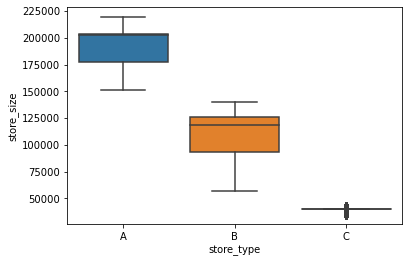

In [14]:
sns.boxplot(x= df['store_type'], y= df['store_size'])

In [15]:
def distribution (df):
    '''
    takes in a df and plot individual variable distributions excluding object type
    '''
    plt.figure
    plt.style.use("ggplot")
    cols =df.columns.to_list()
    for col in cols:
        if df[col].dtype != 'object':
            plt.hist(df[col],color ='blue')
            plt.title(f'Distribution of {col}')
            plt.xlabel(col)
            plt.ylabel('Number of Weeks ')
            plt.xticks(rotation=45)
            plt.ticklabel_format(style = 'plain')
            
            plt.show()

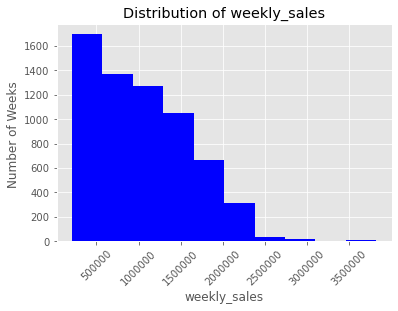

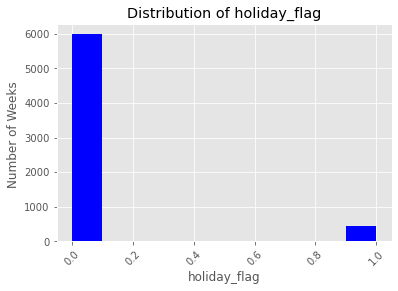

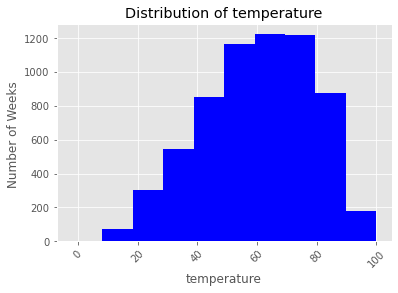

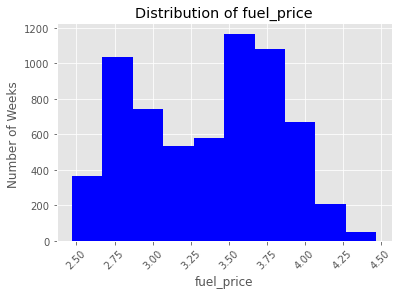

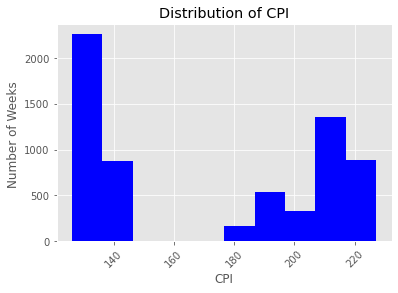

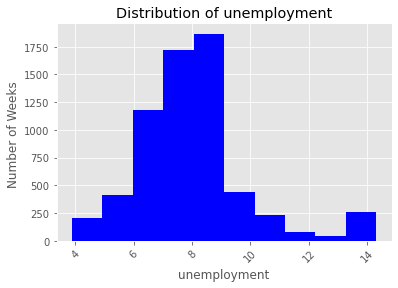

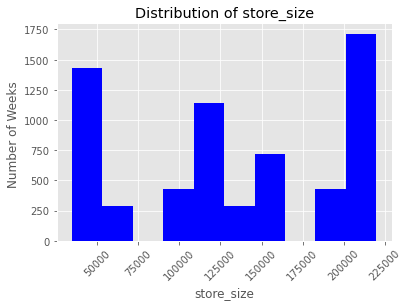

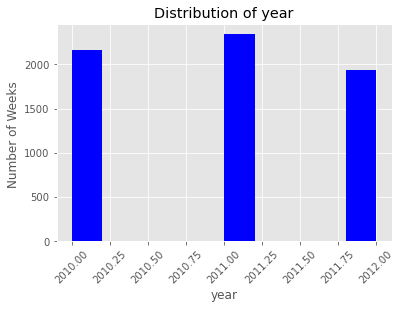

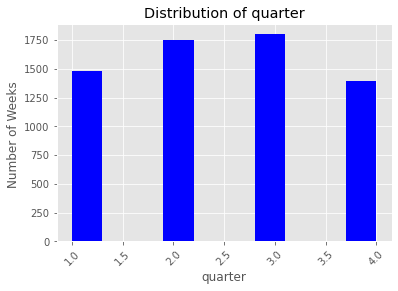

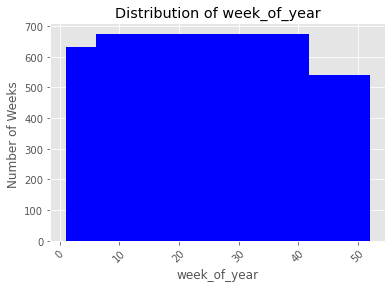

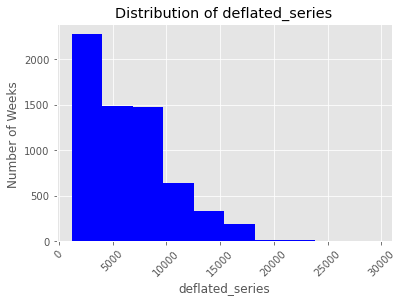

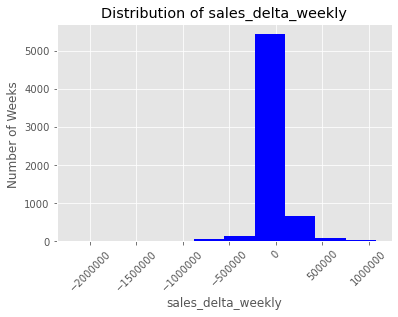

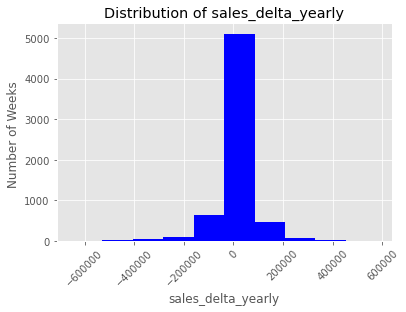

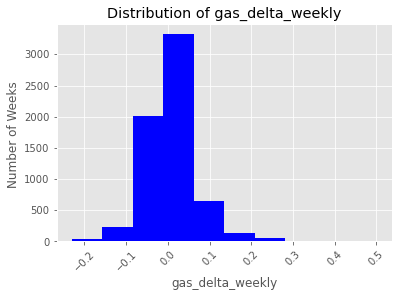

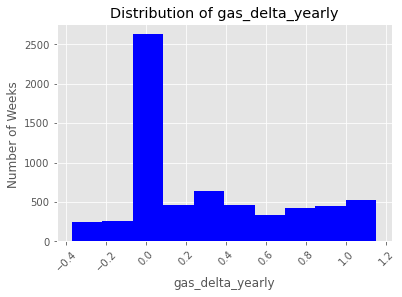

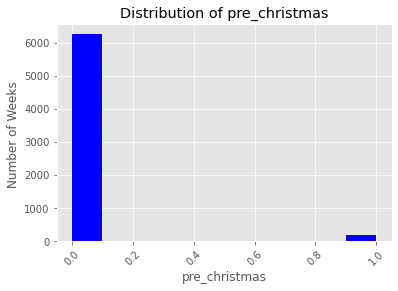

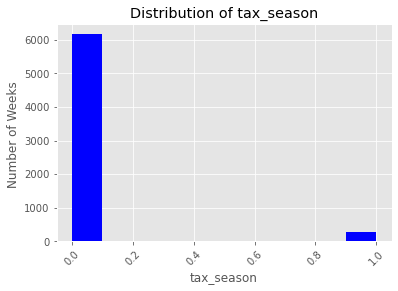

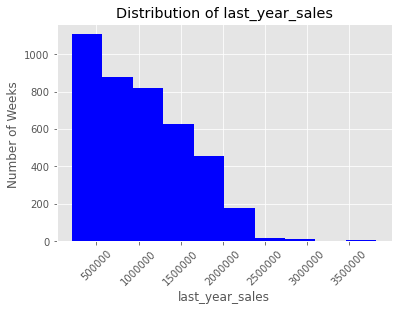

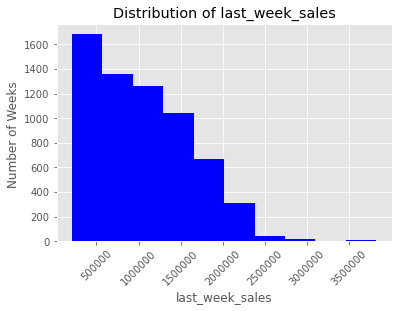

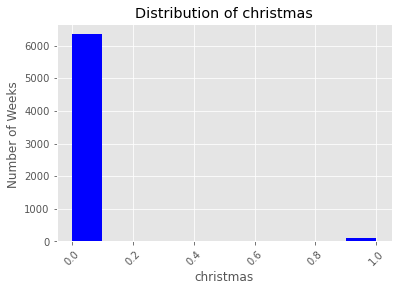

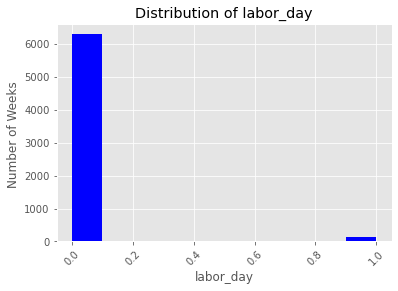

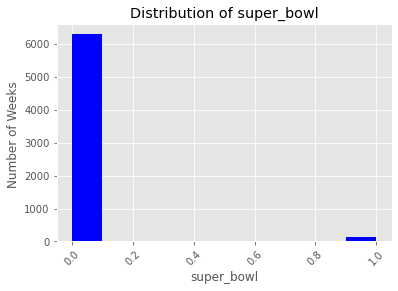

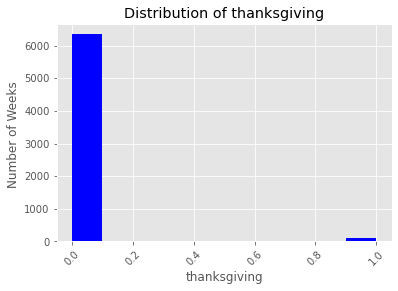

In [16]:
distribution(df)

In [17]:
df.groupby('store_type').mean()

,weekly_sales,holiday_flag,temperature,fuel_price,CPI,unemployment,store_size,year,quarter,week_of_year,...,gas_delta_weekly,gas_delta_yearly,pre_christmas,tax_season,last_year_sales,last_week_sales,christmas,labor_day,super_bowl,thanksgiving
store_type,,,,,,,,,,,,,,,,,,,,,
A,1.482672e+06,0.06993,59.239161,3.340094,174.757753,7.765653,190992.5,2010.965035,2.482517,25.818182,...,0.007297,0.292073,0.027972,0.041958,1.463906e+06,1.483042e+06,0.013986,0.020979,0.020979,0.013986
B,8.846799e+05,0.06993,55.589744,3.399310,161.490490,8.075424,109865.0,2010.965035,2.482517,25.818182,...,0.007837,0.300490,0.027972,0.041958,8.769598e+05,8.848837e+05,0.013986,0.020979,0.020979,0.013986
C,4.189779e+05,0.06993,68.887413,3.334636,180.351532,8.351736,39511.7,2010.965035,2.482517,25.818182,...,0.007524,0.290769,0.027972,0.041958,4.148206e+05,4.190368e+05,0.013986,0.020979,0.020979,0.013986


Store type:  A


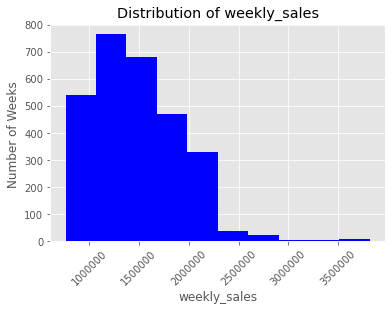

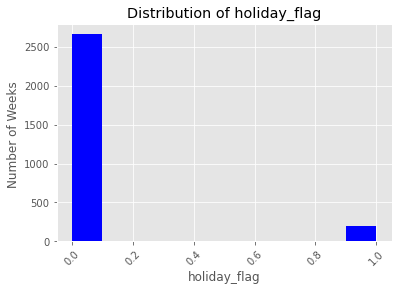

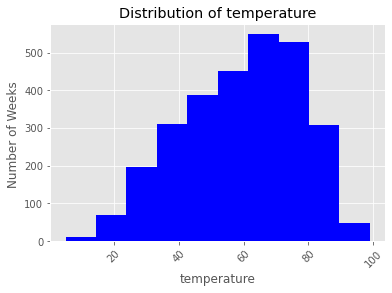

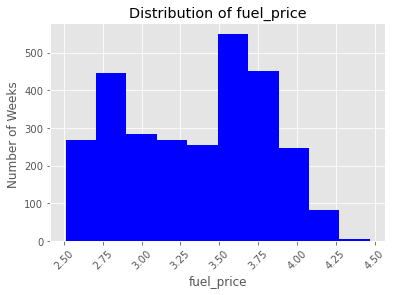

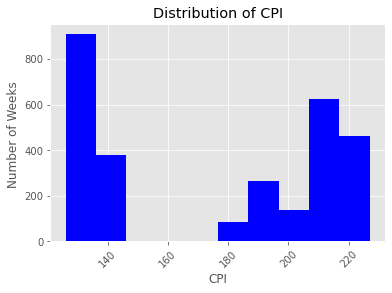

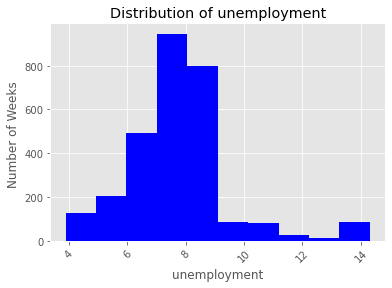

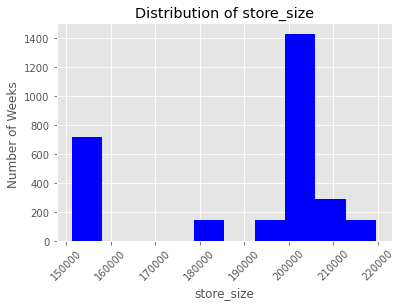

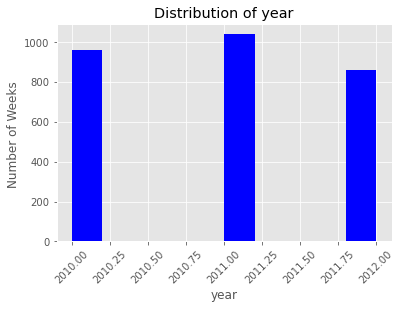

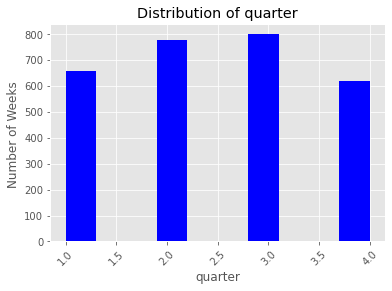

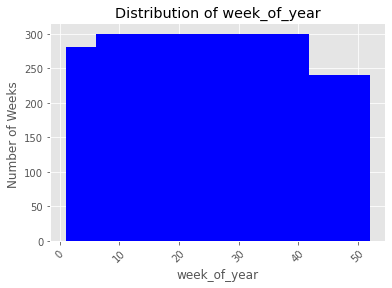

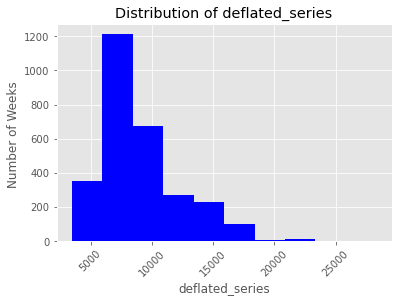

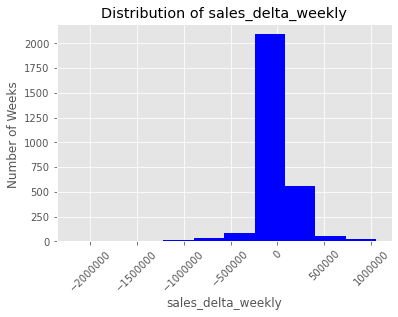

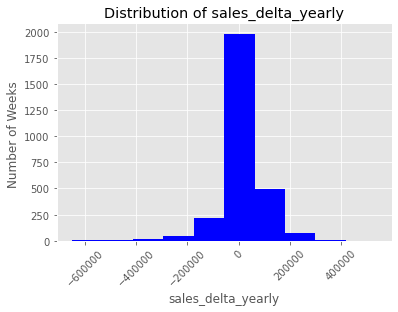

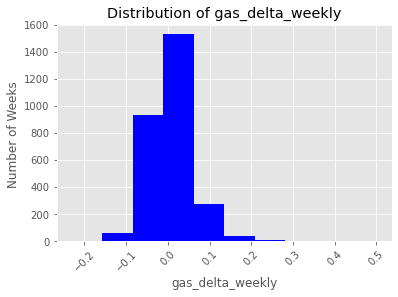

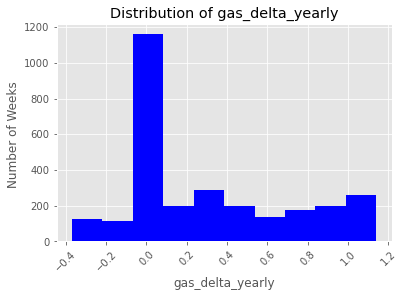

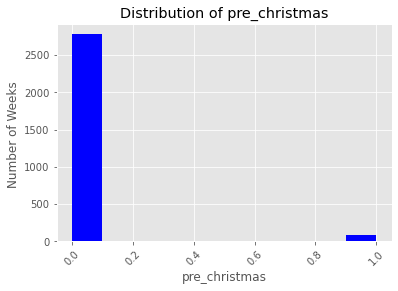

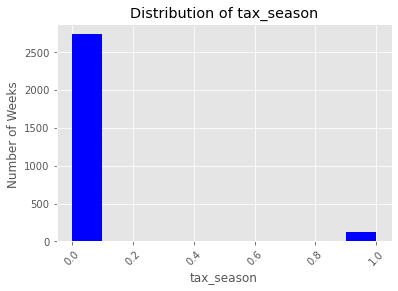

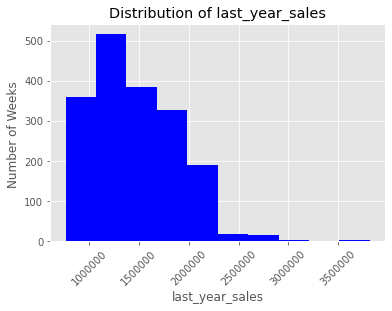

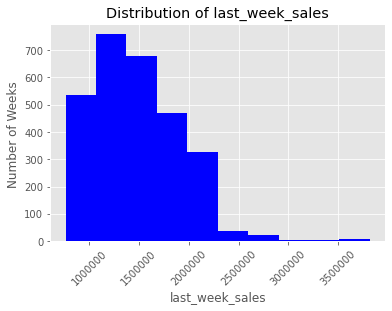

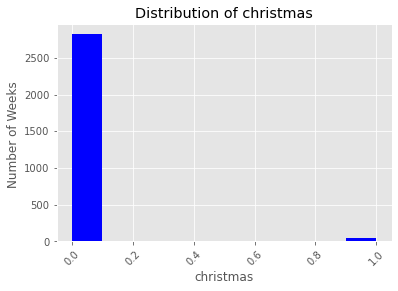

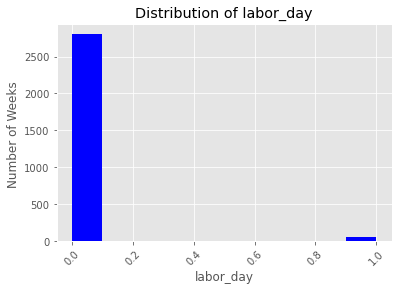

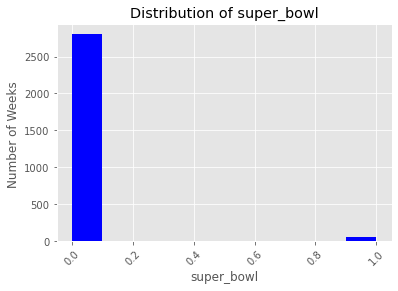

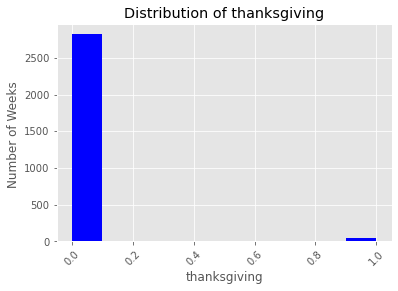

Store type:  B


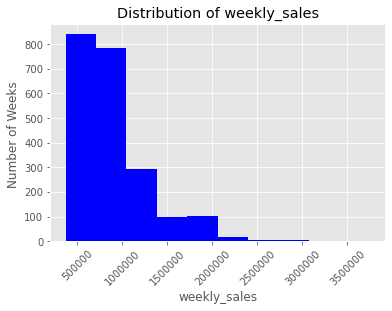

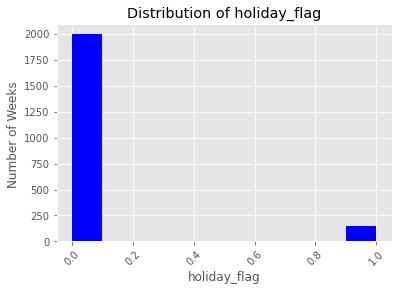

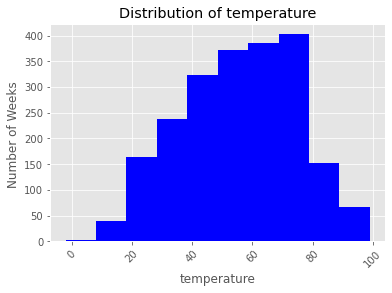

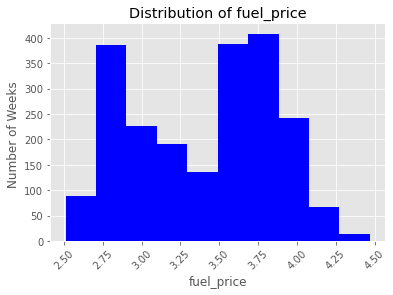

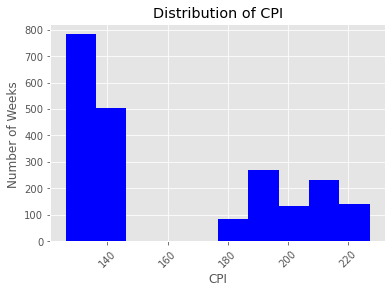

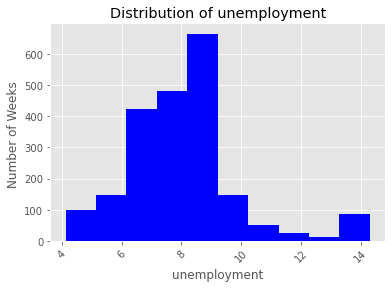

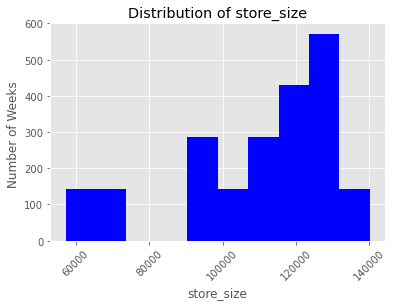

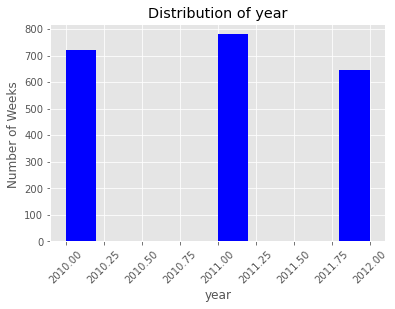

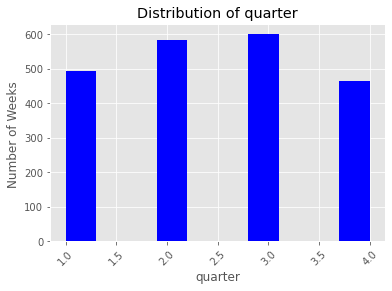

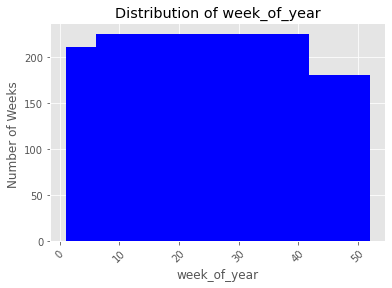

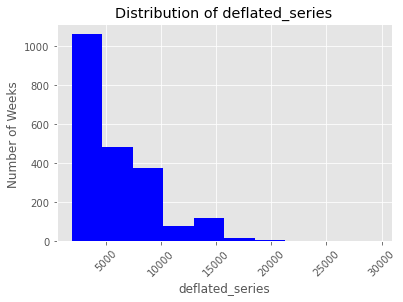

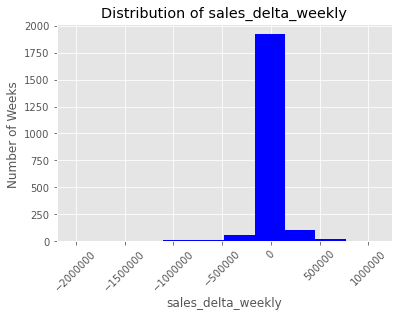

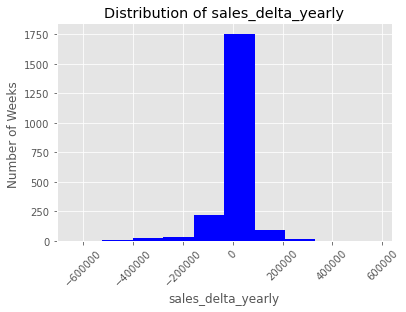

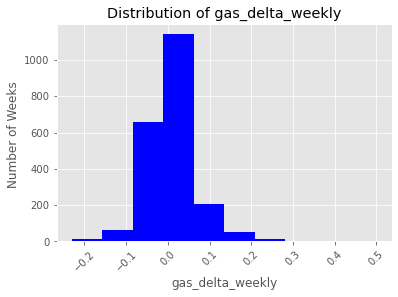

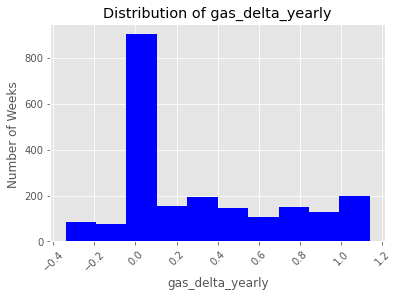

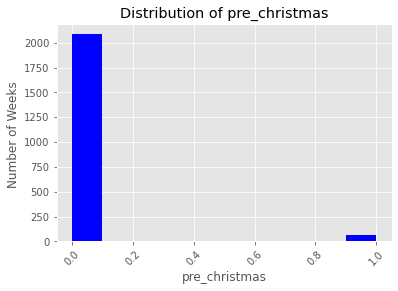

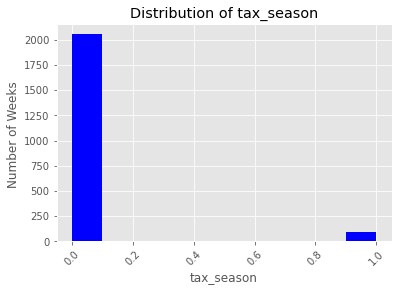

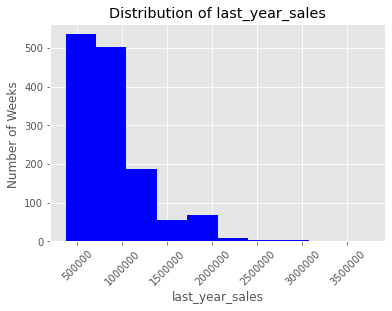

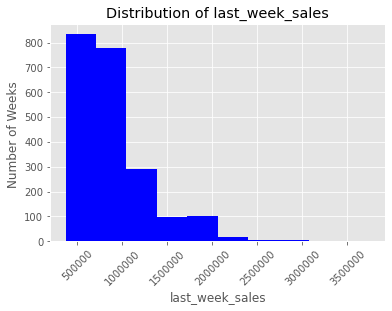

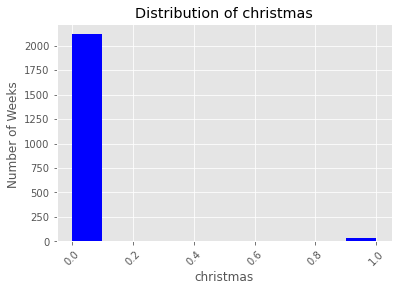

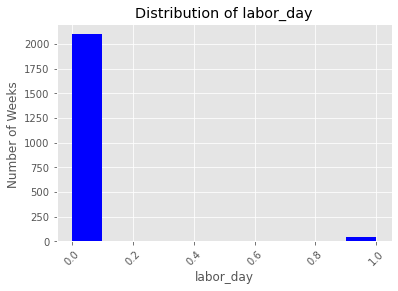

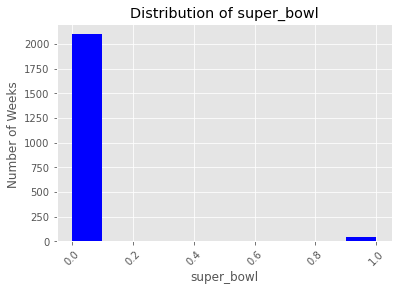

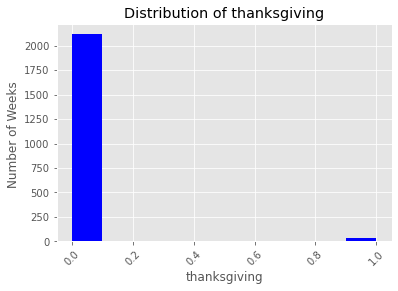

Store type:  C


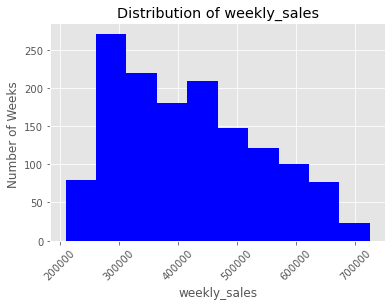

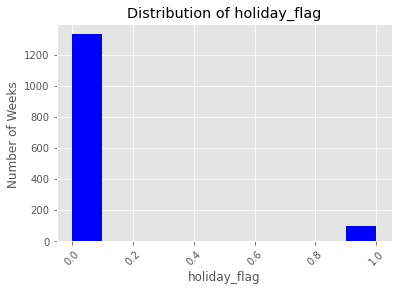

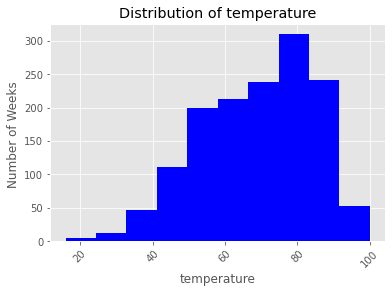

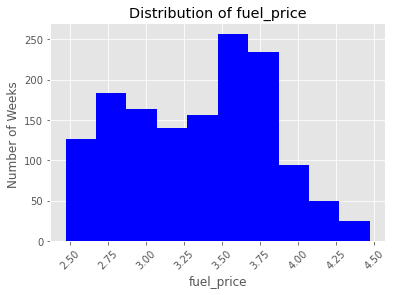

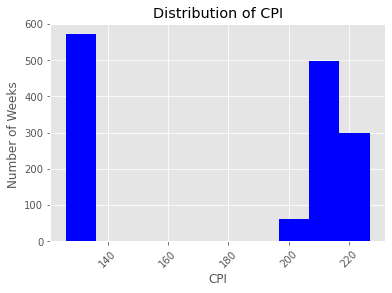

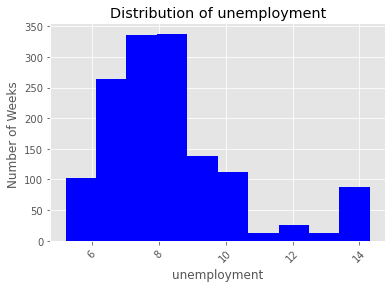

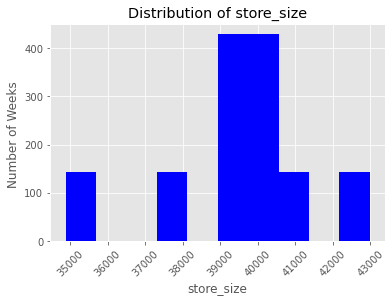

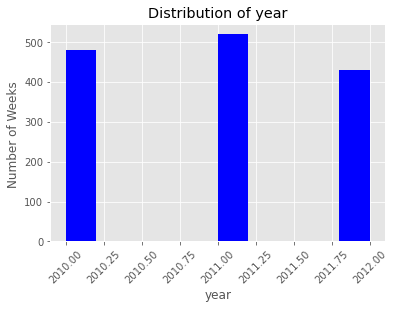

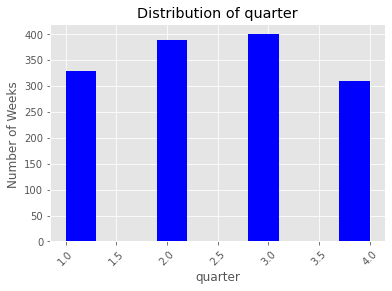

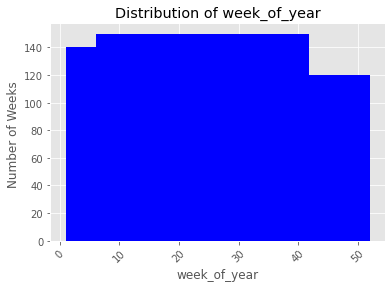

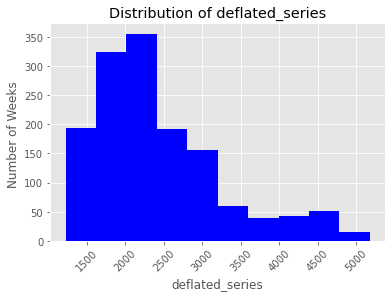

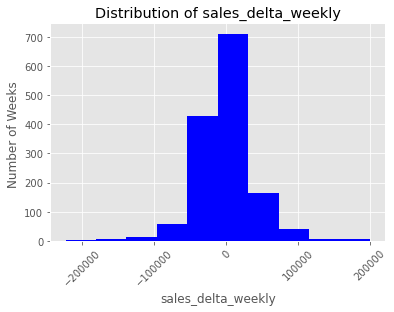

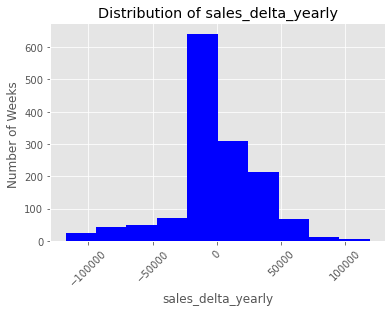

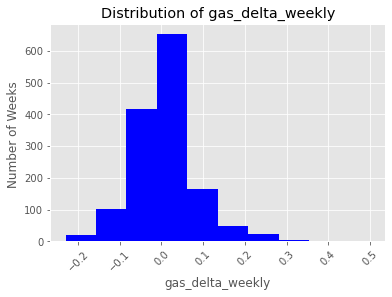

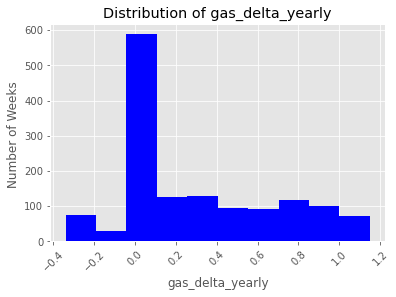

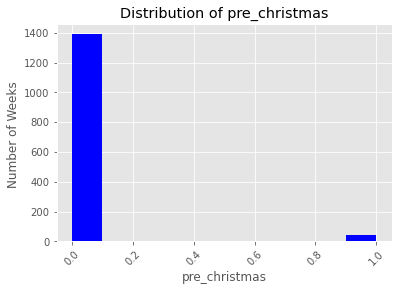

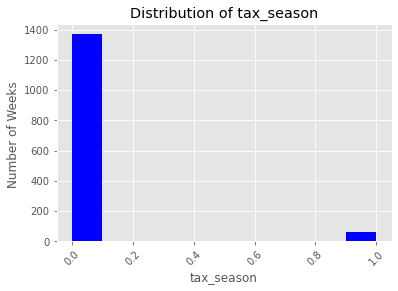

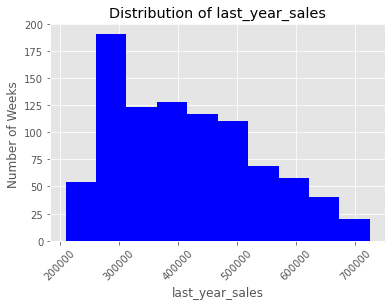

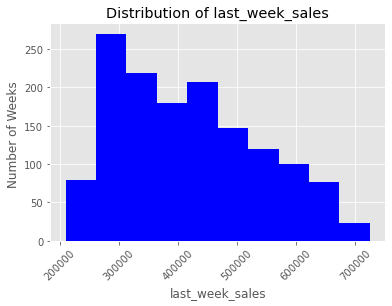

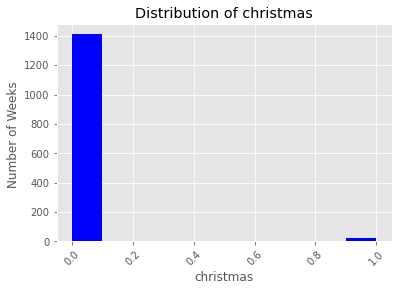

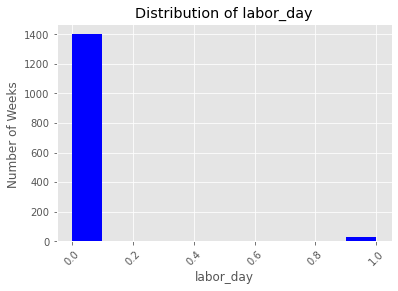

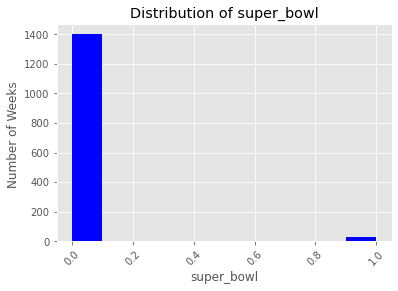

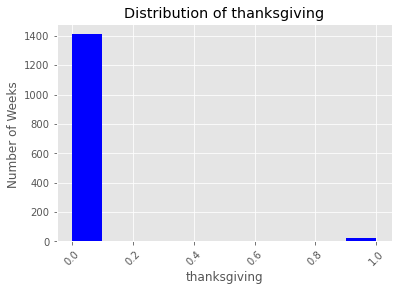

In [18]:
#let see distribution by store type
store_type = ["A", "B", "C"]
for store in store_type:
    print("Store type: ", store)
    distribution(df[df.store_type == store])
    

In [19]:
#how many stores are Type C
len(df[df.store_type == 'C'].store_id.value_counts())

10

In [20]:
# storeid for type c
df[df.store_type == 'C'].store_size.value_counts()

39910    429
39690    429
42988    143
37392    143
41062    143
34875    143
Name: store_size, dtype: int64

In [21]:
#store if for type B
df[df.store_type == 'B'].store_size.value_counts().sort_index()

57197     143
70713     143
93188     143
93638     143
103681    143
112238    143
114533    143
118221    143
119557    143
120653    143
123737    143
125833    143
126512    143
128107    143
140167    143
Name: store_size, dtype: int64

In [22]:
#how many stores are Type B
len(df[df.store_type == 'B'].store_id.value_counts().sort_index())

15

In [23]:
#store_Id for type A
df[df.store_type == 'A'].store_size.value_counts().sort_index()

151315    143
152513    143
155078    143
155083    143
158114    143
184109    143
196321    143
200898    143
202307    143
202505    143
203007    143
203742    143
203750    143
203819    286
204184    143
205863    143
206302    143
207499    143
219622    143
Name: store_size, dtype: int64

In [24]:
##how many stores are Type A
len(df[df.store_type == 'A'].store_id.value_counts().sort_index())

20

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6435 entries, 2010-02-05 to 2012-10-26
Data columns (total 29 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   store_id            6435 non-null   object 
 1   weekly_sales        6435 non-null   float64
 2   holiday_flag        6435 non-null   int64  
 3   temperature         6435 non-null   int64  
 4   fuel_price          6435 non-null   float64
 5   CPI                 6435 non-null   float64
 6   unemployment        6435 non-null   float64
 7   store_type          6435 non-null   object 
 8   store_size          6435 non-null   int64  
 9   month               6435 non-null   object 
 10  year                6435 non-null   int64  
 11  quarter             6435 non-null   int64  
 12  weekday             6435 non-null   object 
 13  week_of_year        6435 non-null   int64  
 14  deflated_series     6435 non-null   float64
 15  sales_delta_weekly  6435 non-null   f

In [26]:
df.tail(1)

,store_id,weekly_sales,holiday_flag,temperature,fuel_price,CPI,unemployment,store_type,store_size,month,...,pre_christmas,tax_season,season,holiday_name,last_year_sales,last_week_sales,christmas,labor_day,super_bowl,thanksgiving
Date,,,,,,,,,,,,,,,,,,,,,
2012-10-26,45,760281.43,0,58,3.88,192.309,8.667,B,118221,October,...,0,0,Fall,no_holiday,781694.57,718125.53,0,0,0,0


In [27]:
df.shape

(6435, 29)

# dummies 

we are going to create dummies for :
- Holiday_name


In [ ]:
#create dummy variables for 5 columns
def create_multiple_dummies (df, dumm_col = ['holiday_name', 'season', 'store_type', 'month', 'year']):
    '''
    Takes in a df and columns to create dummies.
    retunr the original df with de new columns (dimmies)
    '''
    #the column year is an integer we need to conver as string
    df['year']= df['year'].astype('string')
    #create dummy variables 
    for col in dumm_col:
        #create dummies
        df_dummies = pd.get_dummies(df[col], dummy_na=False)
        #  concat df_dummies with my df
        df = pd.concat([df, df_dummies], axis =1)
    #drop no_holiday columns and year
    df = df.drop(columns = ['no_holiday', 'year'])
    return df

In [ ]:
def create_dummies (df, dumm_col = ['holiday_name']):
    '''
    Takes in a df and columns to create dummies.
    retunr the original df with de new columns (dummies)
    '''
    #create dummy variables 
    for col in dumm_col:
        #create dummies
        df_dummies = pd.get_dummies(df[col], dummy_na=False)
        #  concat df_dummies with my df
        df = pd.concat([df, df_dummies], axis =1)
    #drop no_holiday columns and year
    df = df.drop(columns = ['no_holiday'])
    return df

In [ ]:
df_dummies = pd.get_dummies(df['holiday_name'], dummy_na=False)
#  concat df_dummies with my df
df = pd.concat([df, df_dummies], axis =1)
#drop no_holiday columns and year
df = df.drop(columns = ['no_holiday'])

In [ ]:
df['holiday_name'].value_counts()

In [ ]:
df_dummies

In [ ]:
df.info()

In [ ]:
df2 = create_dummies(df)

In [ ]:
df2.info()

In [ ]:
df2.columns

# Create new columns

In [ ]:
#we need to create new columns for is pre- christmas  and tax_season

In [ ]:
#checking the previous weeks for christmas

In [ ]:
df2.head(1)

create a new column for is pre_christmas

-Christmas:

    - 31-Dec-10,  (pre_christmas = 24-Dec-10, 17-Dec 10)
    - 30-Dec-11, (pre_christmas = 23-Dec-11, 16-Dec 11)

In [ ]:
#add zeros to everything
df2 ['pre_christmas'] = 0

In [ ]:
df2.columns

In [ ]:
#getting the list for pre_christmas
pre_c= ['2010-12-24', '2010-12-17', '2011-12-23', '2011-12-16']

In [ ]:
#add value 1 for only pre_christmas weeks
df2.loc[pre_c, 'pre_christmas'] = 1

In [ ]:
#checking if we add the value 
df2.loc[pre_c, 'pre_christmas'].value_counts()

In [ ]:
#CHECK THE VALUES
df2['pre_christmas'].value_counts()

In [ ]:
#ADD TAX SEASON

###  first 2 weeks of April
- 2010-04-02 & 2010-04-09
- 2011-04-01 & 2011-04-08
- 2012-04-06 & 2012-04-13

In [ ]:
df2['tax_season'] = 0 

In [ ]:
#getting the list for tax
tax= ['2010-04-02 ', '2010-04-09', '2011-04-01', '2011-04-08', '2012-04-06', '2012-04-13']

In [ ]:
#add value 1 for only for the list above
df2.loc[tax, 'tax_season'] = 1

In [ ]:
#CHECK THE VALUES
df2['tax_season'].value_counts()

we are going to encode some columns and see which if these columns perform better that dummies

# Scale

In [ ]:
df2.shape

In [ ]:
df2.head(1)

before scaling we need to split our data


In [ ]:
#select only the numeric columns 
num_df = df2.select_dtypes(exclude='object').drop(columns=['store_id'])

In [ ]:
num_df.shape

In [ ]:
num_df.head()

In [ ]:
#split
X_train, y_train, X_test, y_test = new_wrangle.train_test(num_df, 'weekly_sales')

In [ ]:
from sklearn.preprocessing import MinMaxScaler, RobustScaler, StandardScaler

In [ ]:
def scaled_df ( train_df , test_df, columns,  scaler):
    '''
    Take in a 3 df and a type of scaler that you  want to  use. it will scale all columns
    except object type. Fit a scaler only in train and tramnsform in train, validate and test.
    returns  new dfs with the scaled columns.
    scaler : MinMaxScaler() or RobustScaler(), StandardScaler() 
    Example:
    scaled_df( X_train , X_test, columns , RobustScaler())
    
    '''
    #import
    from sklearn.preprocessing import MinMaxScaler, RobustScaler, StandardScaler
    # fit our scaler
    scaler.fit(train_df[columns])
    # get our scaled arrays
    train_scaled = scaler.transform(train_df[columns])
    test_scaled= scaler.transform(test_df[columns])

    # convert arrays to dataframes
    train_scaled_df = pd.DataFrame(train_scaled, columns=columns).set_index([train_df.index.values])
    test_scaled_df = pd.DataFrame(test_scaled, columns=columns).set_index([test_df.index.values])

    #add the columns that are not scaled
    train_scaled_df = pd.concat([train_scaled_df, train_df.drop(columns = columns) ], axis= 1 )
    test_scaled_df = pd.concat([test_scaled_df, test_df.drop(columns = columns) ], axis= 1 )
    #plot
    for col in columns: 
        plt.figure(figsize=(13, 6))
        plt.subplot(121)
        plt.hist(train_df[col], ec='black')
        plt.title('Original')
        plt.xlabel(col)
        plt.ylabel("counts")
        plt.subplot(122)
        plt.hist(train_scaled_df[col],  ec='black')
        plt.title('Scaled')
        plt.xlabel(col)
        plt.ylabel("counts")



    return train_scaled_df,  test_scaled_df

In [ ]:
columns =  X_train.columns.to_list()

In [ ]:
train_Xscaled_df,  test_Xscaled_df= scaled_df( X_train , X_test, columns , MinMaxScaler())

In [ ]:
def train_test(df, target):
    '''
    This function brings in the dataframe and the target feature
    then returns X_train, y_train, X_test and y_test with their respective shapes
    '''
    train = df[:'05-2012'] # includes everything until june 2016
    test = df['06-2012':"2012"] #includes last 6 months

    # split train into X (dataframe, drop target) & y (series, keep target only)
    X_train = train.drop(columns=[target])
    y_train = train[target]

    # split test into X (dataframe, drop target) & y (series, keep target only)
    X_test = test.drop(columns=[target])
    y_test = test[target]

    # Have function print datasets shape
    print(f'X_train -> {X_train.shape}')
    print(f'X_test -> {X_test.shape}')

    return train, X_train, y_train, X_test, y_test

In [ ]:
def split_scale and scale (df, target, scaler):
    '''
    takes in a df and creates dummy variablesn, select only the n umeric columns and  split into X_train, y_train, 
    X_test, y_test and scaled X_train, X_test.
    return   X_train_scaled, y_train_scaled, X_test, y_test
    '''



    #split
    train, X_train, y_train, X_test, y_test = train_test(num_df, target)

    #select the columns to scale
    columns =  X_train.select_dtypes(exclude='object').columns.to_list()
    #scale 
    X_train_scaled, X_test_scaled = scaled_df( X_train , X_test, columns , scaler)

    return train, X_train_scaled, X_test_scaled, y_train, y_test
        
        
        
        
    

In [ ]:
import prepare as pre

In [ ]:
train, X_train_scaled, y_train_scaled, X_test, y_test = prepare_modeling_dummies (df, 'weekly_sales', MinMaxScaler())

In [ ]:
train.shape

In [ ]:
X_train_scaled.shape

# split 

In [ ]:
train, test,  X_train_scaled, X_test_scaled, y_train, y_test = new_wrangle.split_scale(df, 'weekly_sales', MinMaxScaler())

# Wrangle and split

In [28]:
df =new_wrangle.wrangle_walmart()

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6435 entries, 2010-02-05 to 2012-10-26
Data columns (total 29 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   store_id            6435 non-null   object 
 1   weekly_sales        6435 non-null   float64
 2   holiday_flag        6435 non-null   int64  
 3   temperature         6435 non-null   int64  
 4   fuel_price          6435 non-null   float64
 5   CPI                 6435 non-null   float64
 6   unemployment        6435 non-null   float64
 7   store_type          6435 non-null   object 
 8   store_size          6435 non-null   int64  
 9   month               6435 non-null   object 
 10  year                6435 non-null   int64  
 11  quarter             6435 non-null   int64  
 12  weekday             6435 non-null   object 
 13  week_of_year        6435 non-null   int64  
 14  deflated_series     6435 non-null   float64
 15  sales_delta_weekly  6435 non-null   f

train -> (4504, 29)
test -> (1931, 29)


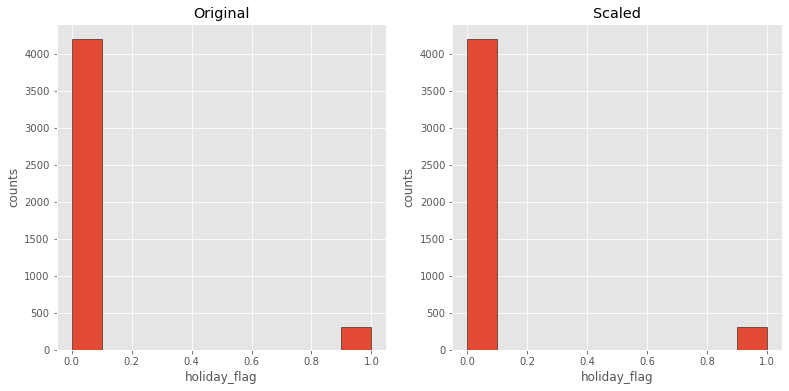

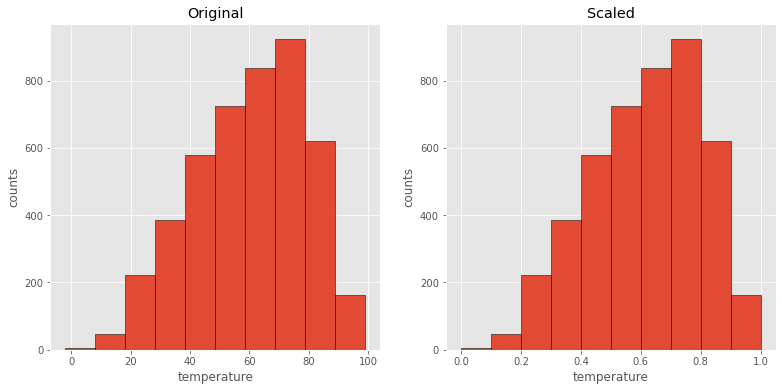

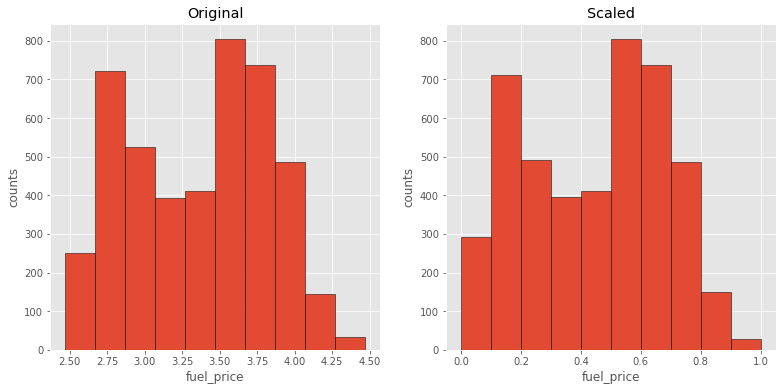

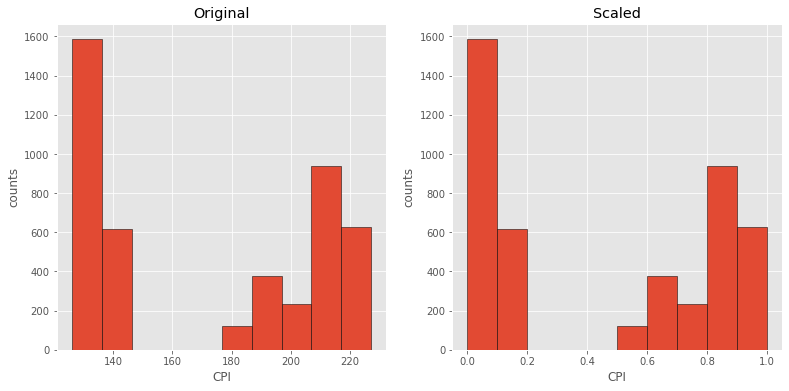

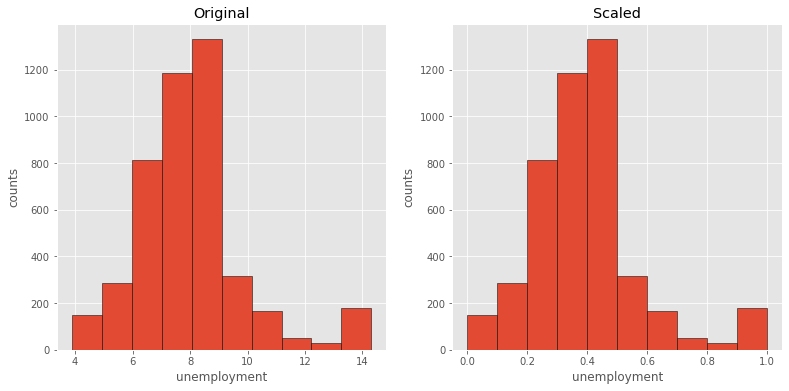

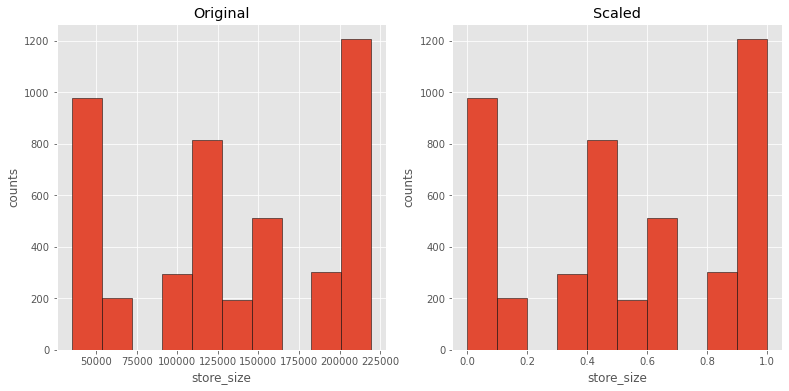

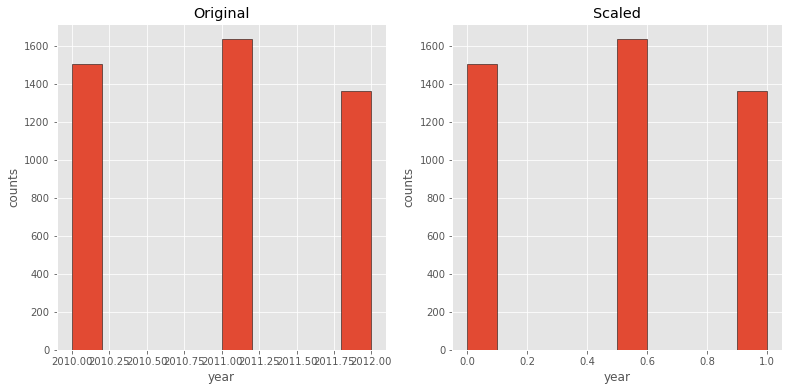

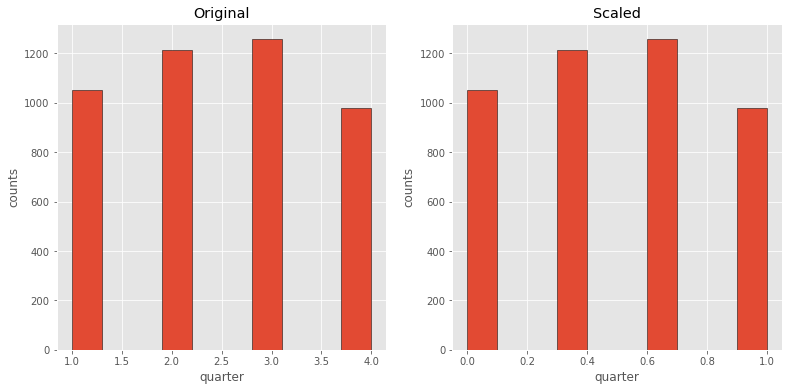

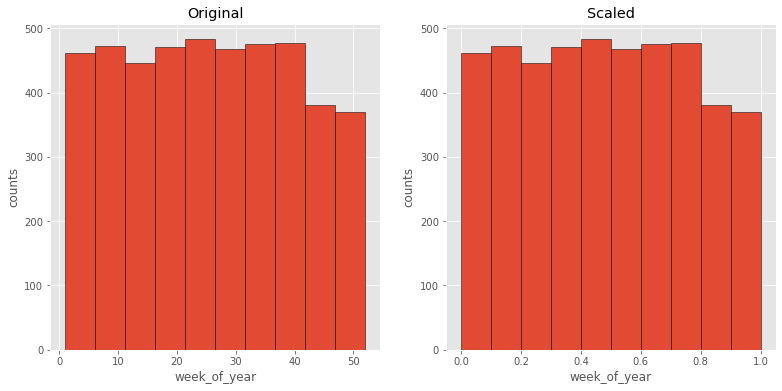

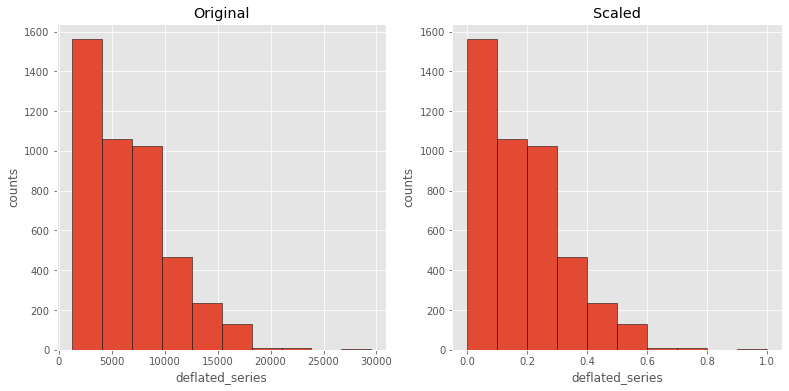

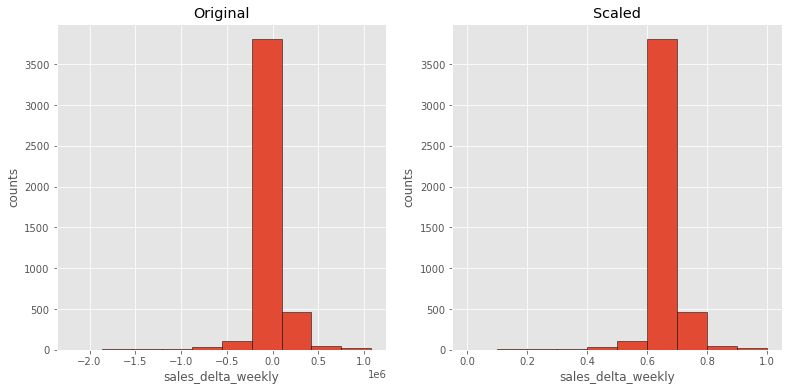

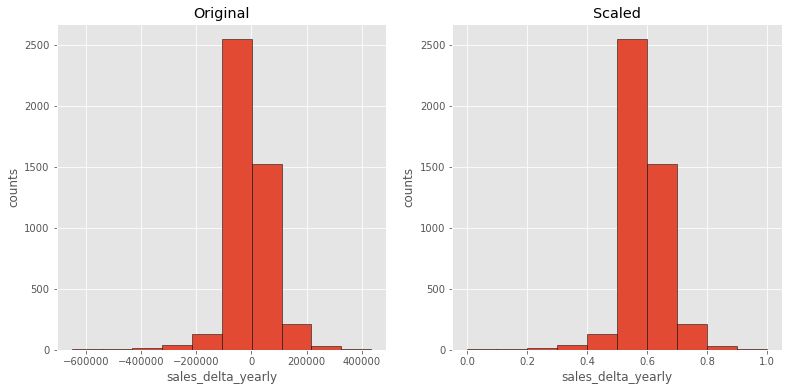

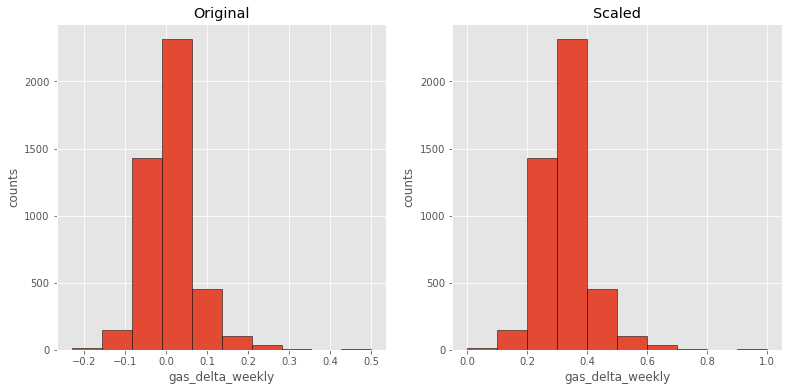

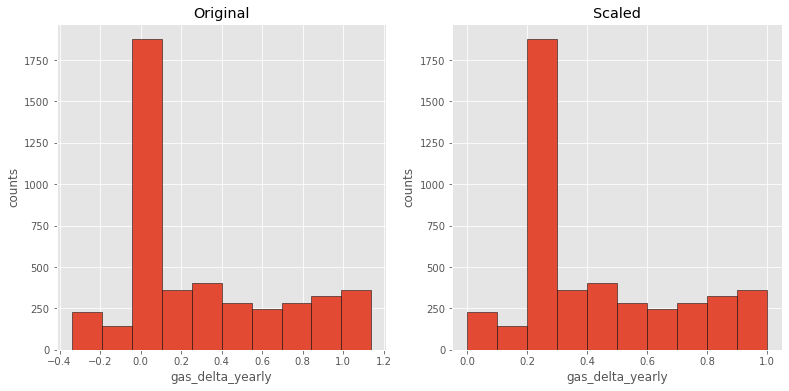

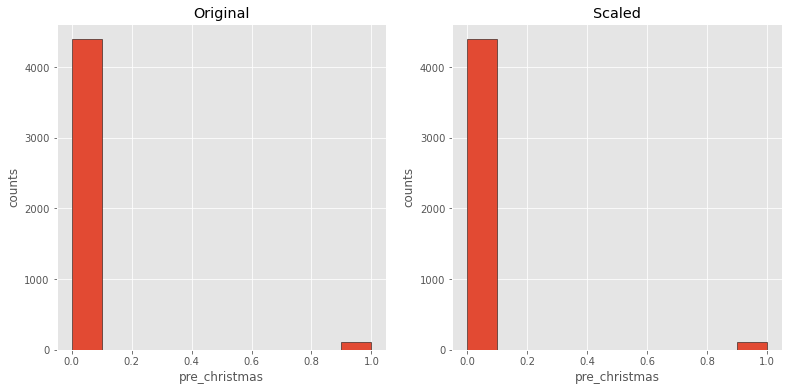

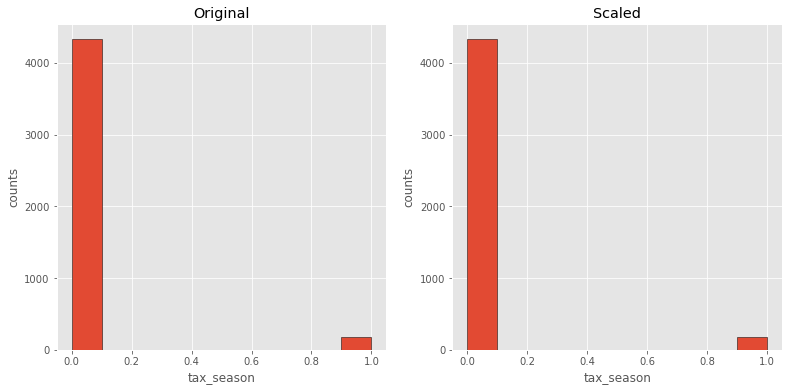

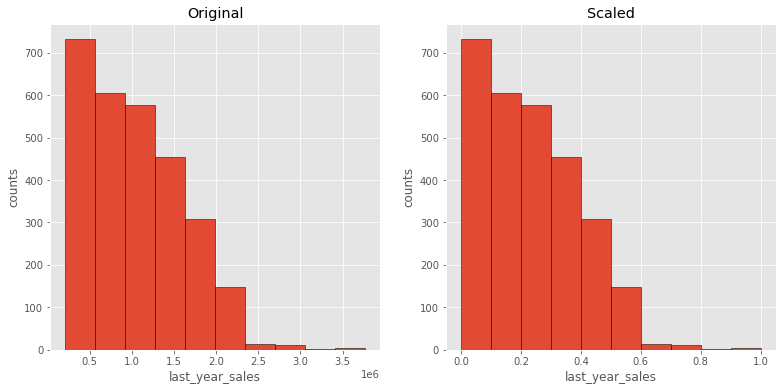

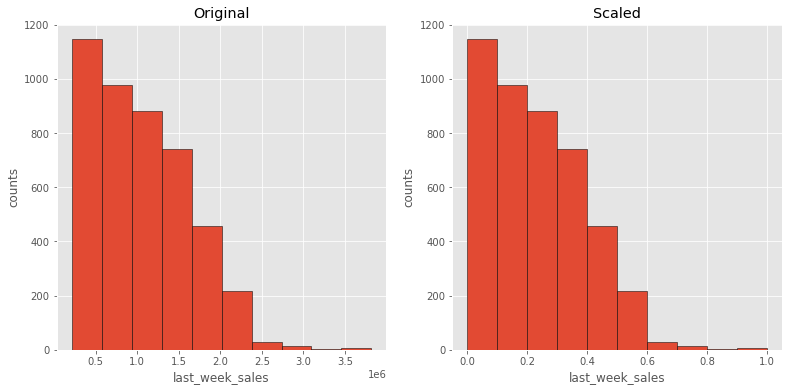

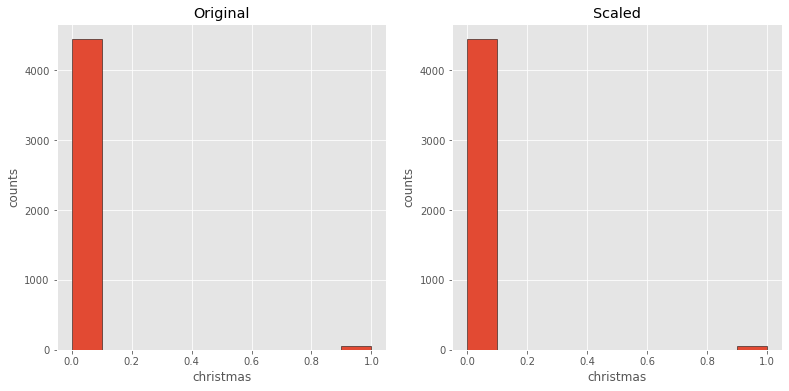

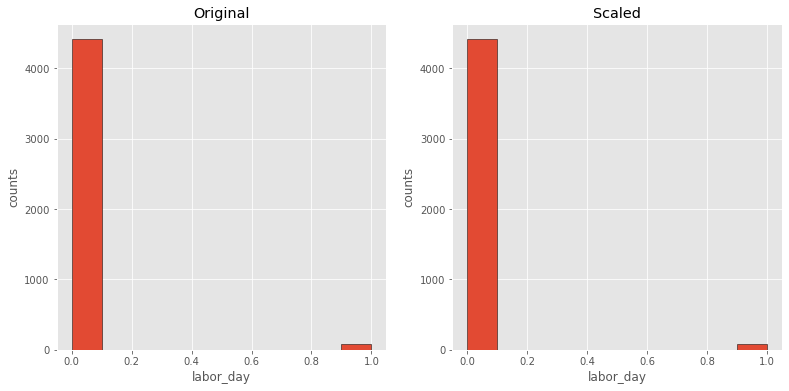

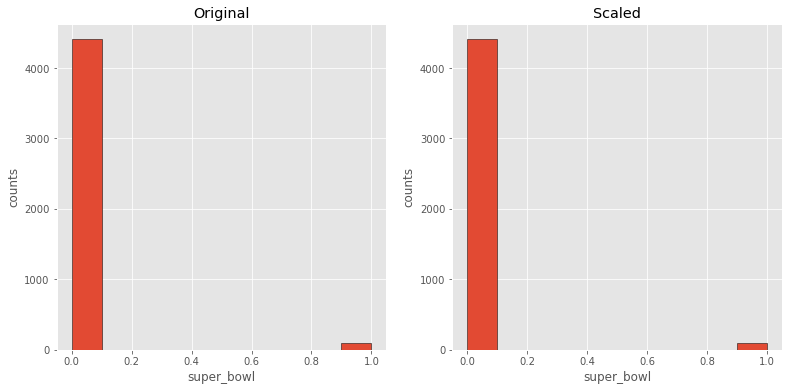

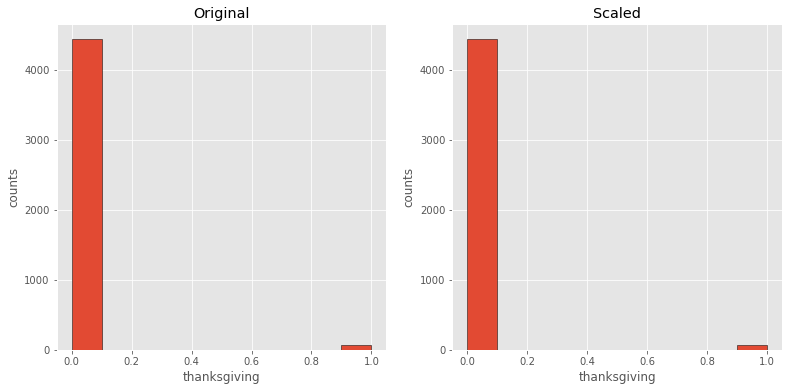

In [30]:
train, test,  X_train_scaled, X_test_scaled, y_train, y_test = new_wrangle.split_scale(df, 'weekly_sales', MinMaxScaler())

In [31]:
train.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4504 entries, 2010-07-30 to 2011-08-12
Data columns (total 29 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   store_id            4504 non-null   object 
 1   weekly_sales        4504 non-null   float64
 2   holiday_flag        4504 non-null   int64  
 3   temperature         4504 non-null   int64  
 4   fuel_price          4504 non-null   float64
 5   CPI                 4504 non-null   float64
 6   unemployment        4504 non-null   float64
 7   store_type          4504 non-null   object 
 8   store_size          4504 non-null   int64  
 9   month               4504 non-null   object 
 10  year                4504 non-null   int64  
 11  quarter             4504 non-null   int64  
 12  weekday             4504 non-null   object 
 13  week_of_year        4504 non-null   int64  
 14  deflated_series     4504 non-null   float64
 15  sales_delta_weekly  4504 non-null   f

# Explore 

In [32]:
df.shape

(6435, 29)

In [33]:
train.shape

(4504, 29)

In [34]:
train.head(1)

,store_id,weekly_sales,holiday_flag,temperature,fuel_price,CPI,unemployment,store_type,store_size,month,...,pre_christmas,tax_season,season,holiday_name,last_year_sales,last_week_sales,christmas,labor_day,super_bowl,thanksgiving
Date,,,,,,,,,,,,,,,,,,,,,
2010-07-30,38,336378.38,0,96,3.02,126.107,14.18,C,39690,July,...,0,0,Summer,no_holiday,NaN,328336.85,0,0,0,0


In [35]:
train.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4504 entries, 2010-07-30 to 2011-08-12
Data columns (total 29 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   store_id            4504 non-null   object 
 1   weekly_sales        4504 non-null   float64
 2   holiday_flag        4504 non-null   int64  
 3   temperature         4504 non-null   int64  
 4   fuel_price          4504 non-null   float64
 5   CPI                 4504 non-null   float64
 6   unemployment        4504 non-null   float64
 7   store_type          4504 non-null   object 
 8   store_size          4504 non-null   int64  
 9   month               4504 non-null   object 
 10  year                4504 non-null   int64  
 11  quarter             4504 non-null   int64  
 12  weekday             4504 non-null   object 
 13  week_of_year        4504 non-null   int64  
 14  deflated_series     4504 non-null   float64
 15  sales_delta_weekly  4504 non-null   f

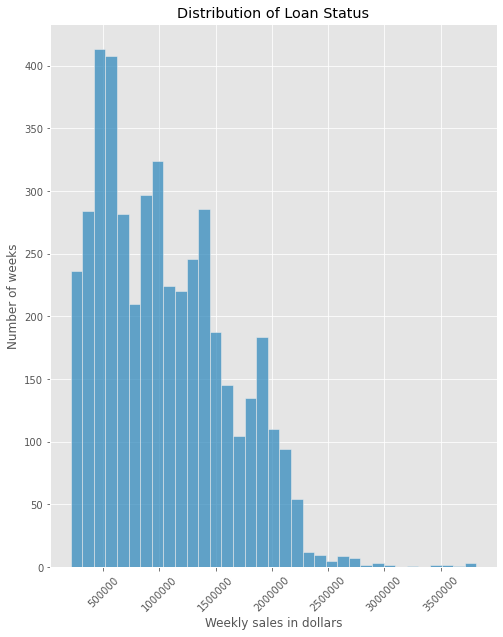

In [36]:
plt.figure(figsize=(8, 10))
sns.histplot(train,
                 x=train['weekly_sales'],
                 #hue='loan_status',
                 multiple='layer'
                 )
plt.title("Distribution of Loan Status")
plt.xlabel('Weekly sales in dollars')
plt.ylabel('Number of weeks')
plt.xticks(rotation=45)
plt.ticklabel_format(style = 'plain')

plt.show()

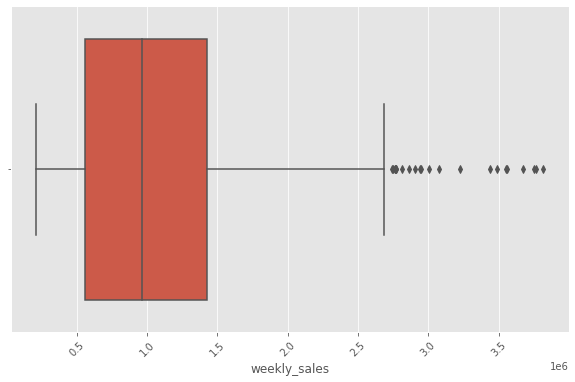

In [37]:
plt.figure(figsize=(10,6))
sns.boxplot(train['weekly_sales'])
plt.xticks(rotation=45)
#plt.ticklabel_format(style = 'plain')
plt.show()

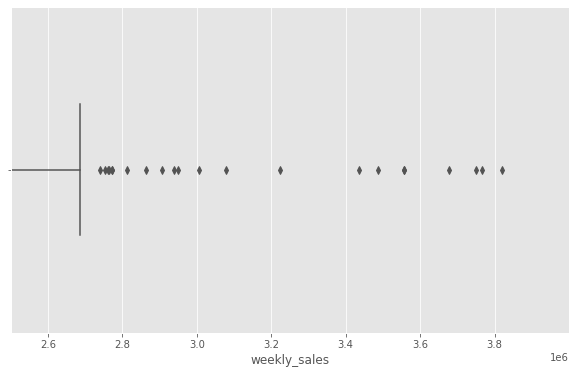

In [38]:
plt.figure(figsize=(10,6))
sns.boxplot(train['weekly_sales'])
plt.xlim(2500000)
plt.show()

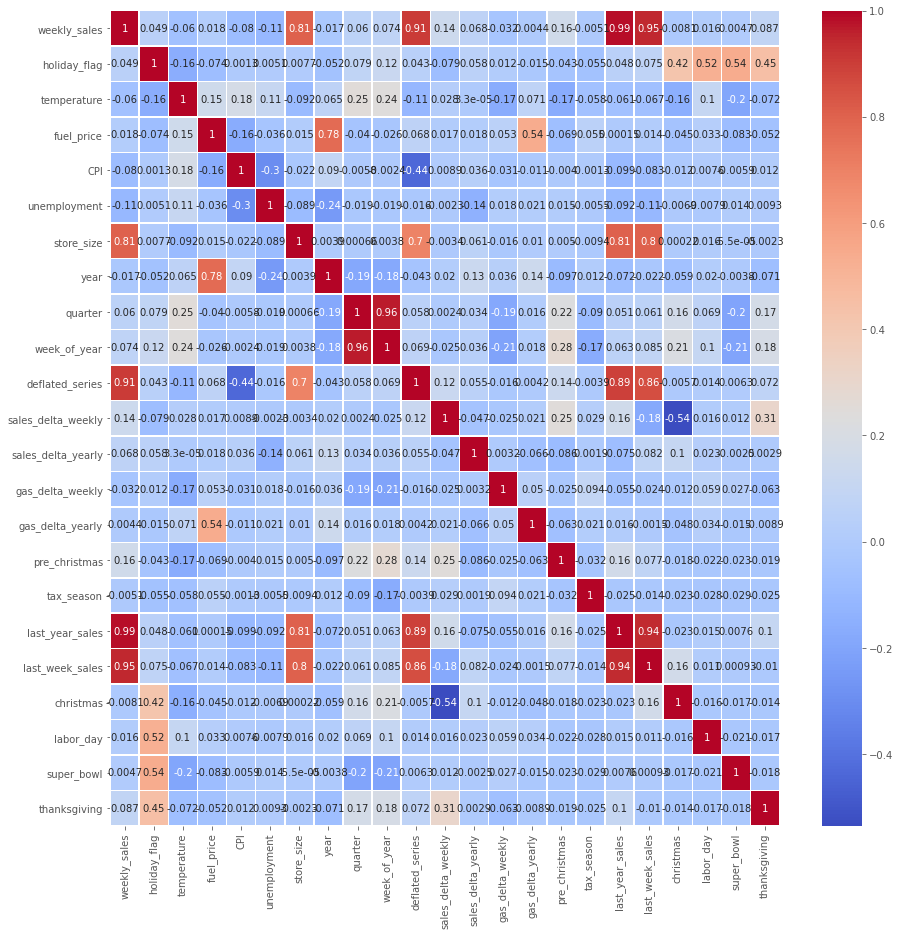

In [39]:
plt.figure(figsize=(15, 15))
sns.heatmap(train.corr(), cmap='coolwarm', annot=True, linewidth=0.5)
plt.show()

In [40]:
train.shape

(4504, 29)

In [41]:
train.corr().weekly_sales.sort_values()

unemployment         -0.105720
CPI                  -0.079903
temperature          -0.059755
gas_delta_weekly     -0.032381
year                 -0.016689
christmas            -0.008127
tax_season           -0.005059
gas_delta_yearly      0.004431
super_bowl            0.004721
labor_day             0.015903
fuel_price            0.017789
holiday_flag          0.049335
quarter               0.060105
sales_delta_yearly    0.067596
week_of_year          0.074466
thanksgiving          0.086918
sales_delta_weekly    0.139101
pre_christmas         0.155766
store_size            0.807157
deflated_series       0.906224
last_week_sales       0.949236
last_year_sales       0.987332
weekly_sales          1.000000
Name: weekly_sales, dtype: float64

<Figure size 864x720 with 0 Axes>

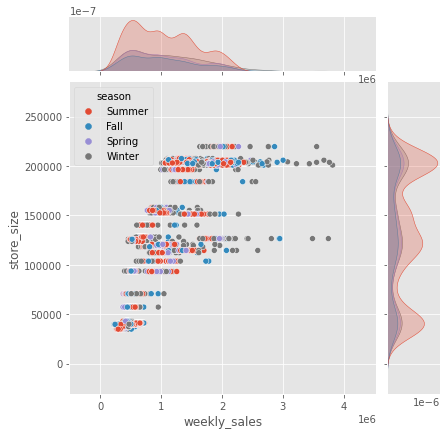

In [43]:
plt.figure(figsize=(12, 10))
sns.jointplot(x= 'weekly_sales', y= 'store_size', data = train, hue ='season')

In [ ]:
train.columns

<Figure size 864x720 with 0 Axes>

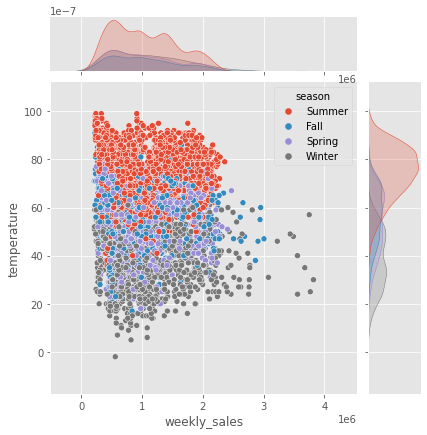

In [44]:
plt.figure(figsize=(12, 10))
sns.jointplot(x= 'weekly_sales', y= 'temperature', data = train, hue= "season")

In [ ]:
# winter_df = train[train.season == "Winter"][['weekly_sales', 'temperature', 'season']]
# winter_df.head()

In [60]:
# sns.jointplot(x= 'weekly_sales', y= 'temperature', data = winter_df, hue= "season")

In [46]:
train.season.unique()

array(['Summer', 'Fall', 'Spring', 'Winter'], dtype=object)

In [47]:
color_list = ['blue','green', 'red', 'orange']

In [48]:
for season, color in zip(train.season.unique(), color_list):
    print(season, color)

Summer blue
Fall green
Spring red
Winter orange


Summer


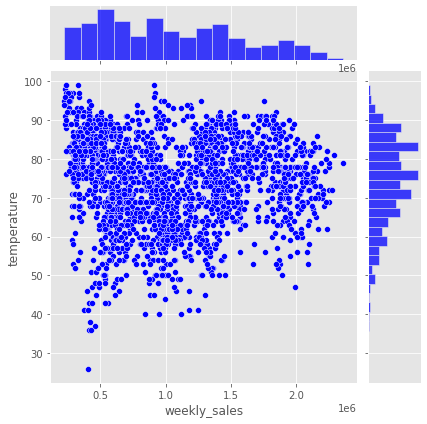

Fall


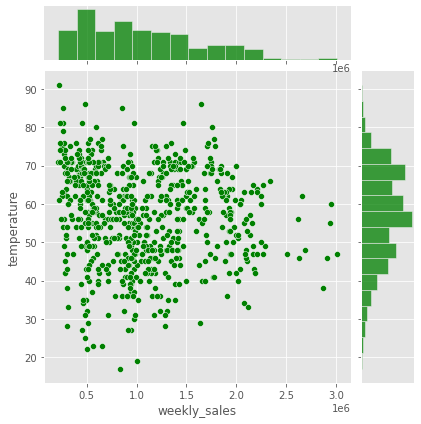

Spring


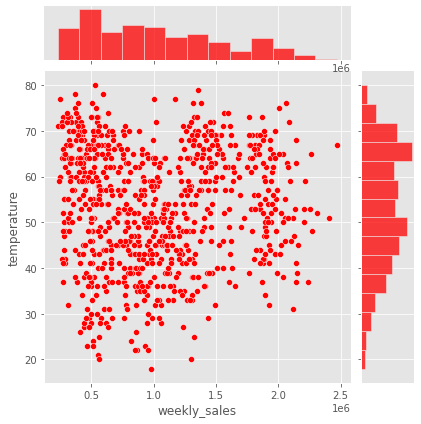

Winter


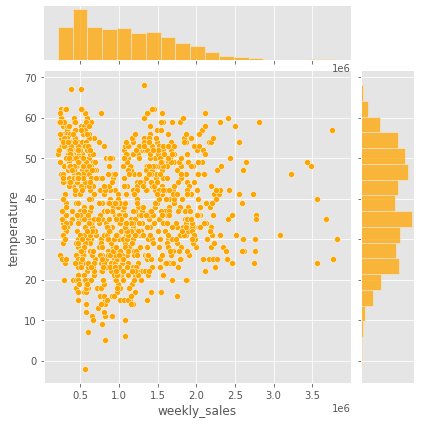

In [49]:

for season, c in zip(train.season.unique(), color_list):
    print(season)
    sns.jointplot(x= 'weekly_sales', y= 'temperature', data = train[train.season==season], color= c)
    plt.show()

<AxesSubplot:xlabel='weekly_sales'>

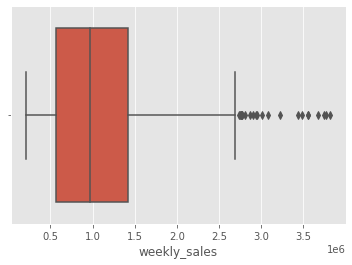

In [50]:
sns.boxplot(x= train['weekly_sales'] )

<AxesSubplot:xlabel='holiday_name', ylabel='weekly_sales'>

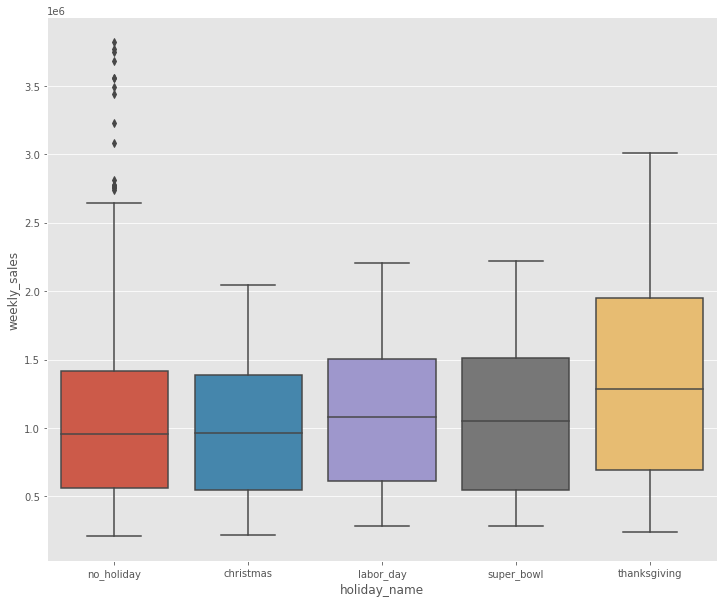

In [51]:
plt.figure(figsize=(12,10))
sns.boxplot(x= train['holiday_name'], y =train['weekly_sales'] )

<AxesSubplot:xlabel='season', ylabel='weekly_sales'>

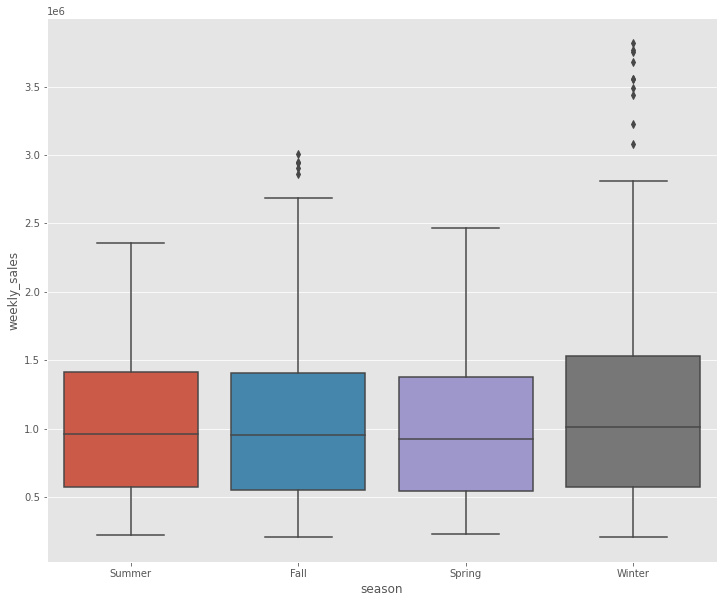

In [52]:
plt.figure(figsize=(12,10))
sns.boxplot(x= train['season'], y =train['weekly_sales'] )

Summer


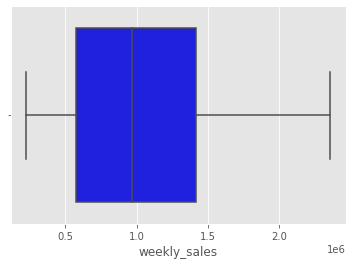

Fall


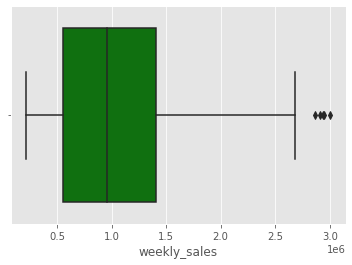

Spring


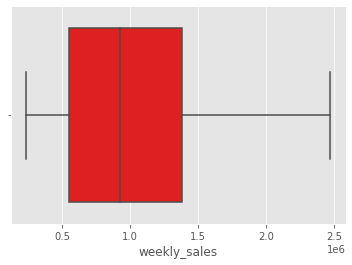

Winter


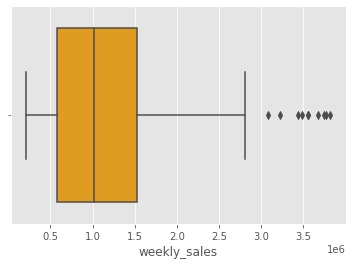

In [53]:
for season, c in zip(train.season.unique(), color_list):
    print(season)
    sns.boxplot(x= train[train.season== season]['weekly_sales'], color = c )
    plt.show()

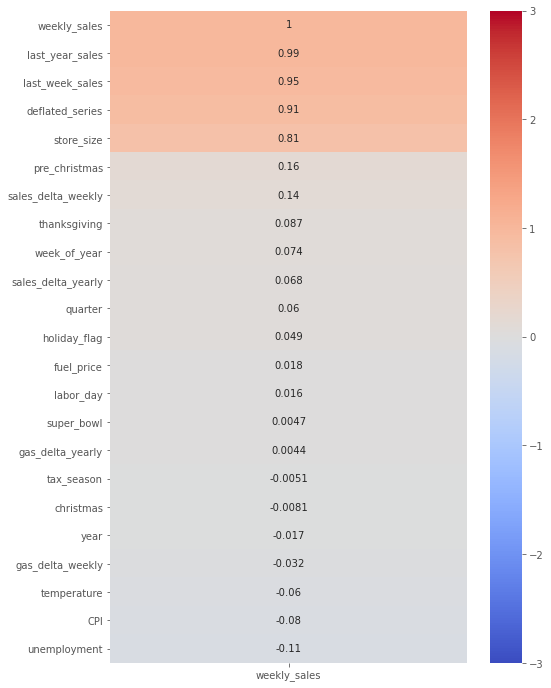

In [54]:
#let's focus on my target
plt.figure(figsize=(8, 12))
heatmap = sns.heatmap(train.corr()[['weekly_sales']].sort_values(by='weekly_sales', ascending=False), vmin=-3, vmax=3, annot=True, cmap='coolwarm')

# model

In [61]:

#conver y_train y _ validate to df
y_train = pd.DataFrame( {'actual': y_train})
y_test = pd.DataFrame( {'actual': y_test})

ValueError: If using all scalar values, you must pass an index

In [62]:
def baseline_errors(df, y, option ):
    '''
    Takes in a dataframe , y = column with actual_values 
    and calculate:
    sum of squared errors (SSE)
    explained sum of squares (ESS)
    total sum of squares (TSS)
    mean squared error (MSE)
    root mean squared error (RMSE)
    Returns a dictionary with all these values
    Example:
    baseline_mean_errors(y_train, 'actual')
    '''
    #import
    from sklearn.metrics import  mean_squared_error
    from math import sqrt

    #baseline
    if option == 'mean':
        df['yhat_baseline_mean'] = df[y].mean()
        col = 'yhat_baseline_mean'
    elif option == 'median':
        df['yhat_baseline_median'] = df[y].median()
        col = 'yhat_baseline_median'
    else:
        return print("please select the correct option: 'mean' or 'median' ")
        
    

    #calculate SSE using sklearn
    SSE_baseline = mean_squared_error(df[y], df[col])*len(df)
    #explained sum of squares (ESS)
    ESS_b = ((df[col] - df[y].mean())**2).sum()
    #total sum of squares (TSS)
    TSS_b = ((df[y] - df[y].mean())**2).sum()
    #mean squared error (MSE)
    MSE_baseline = mean_squared_error(df[y], df[col])
    #root mean squared error (RMSE)
    RMSE_baseline = sqrt(MSE_baseline)
    
    #create dicc
    b ={
        'sse': SSE_baseline,
        'mse': MSE_baseline,
        'rmse': RMSE_baseline,
         'tss': TSS_b,
        'ess' : ESS_b,
        'mse': MSE_baseline,
        'r2': ESS_b/TSS_b,       
    }

    return b

In [63]:
def select_rfe (X_df, y_df, n_features, method):
    '''
    Takes in the predictors, the target, and the number of features to select (k) ,
    and returns the names of the top k selected features based on the Recursive Feature Elimination (RFE)
    X_df : the predictors
    y_df : the target
    n_features : the number of features to select (k)
    method : LinearRegression, LassoLars, TweedieRegressor
    Example
    select_rfe(X_train_scaled, y_train, 2, LinearRegression())
    '''
    lm = method
    rfe = RFE(estimator=lm, n_features_to_select= n_features)
    rfe.fit(X_df, y_df)
    top_rfe = list(X_df.columns[rfe.support_])
    print(f'The top {n_features} selected feautures based on the the RFE class class are: {top_rfe}' )
    print(pd.Series(dict(zip(X_df.columns, rfe.ranking_))).sort_values())
    return top_rfe

In [64]:
def select_kbest  (X_df, y_df, n_features):
    '''
    Takes in the predictors, the target, and the number of features to select (k),
    and returns the names of the top k selected features based on the SelectKBest class
    
    X_df : the predictors
    y_df : the target
    n_features : the number of features to select (k)
    Example
    select_kbest(X_train_scaled, y_train, 2)
    '''
    
    f_selector = SelectKBest(score_func=f_classif, k= n_features)
    f_selector.fit(X_df, y_df)
    mask = f_selector.get_support()
    X_df.columns[mask]
    top = list(X_df.columns[mask])
    print(f'The top {n_features} selected feautures based on the SelectKBest class are: {top}' )
    return top

In [65]:
def create_model (X_df_scaled, y_df, actual, method, name):
    '''
    takes in features scaled df, target df, name of actual target, 
    type of method and the name of the selected method and 
    returns a dictionary that contains calculated regression errors.
    
    X_df_scaled : df that contains scaled featues
    y_df: target df
    actual: name of the column where is actual value of the target
    mehod: type of method to create the model object
    name: enter the new name for your model
    
    Example:
    create_model(X_train_scaled[top_sb], y_train, 'actual', LinearRegression(normalize=True), 'modelOLS' )
    '''
    # fit the thing
    method.fit(X_df_scaled, y_df[actual])

    # predict train
    y_df[name] = method.predict(X_df_scaled)

    #calculate regression errors using a created function
    train_eval = eval.regression_errors(y_df, actual, name)

    return train_eval

In [66]:
def report(metric_df):
    
    from IPython.display import display, HTML
    rmse_base = metric_df.iloc[0,2]
    print(f'These are the models that perform better than our baseline rmse: {rmse_base}')
    dfs =metric_df[['model', 'rmse_validate']][metric_df['rmse_validate'] < rmse_base]
    display(HTML(dfs.to_html()))
    
    
    min_val = metric_df['rmse_validate'].idxmin()
    metric_df.iloc[min_val][0]
    rsme_bet = round(metric_df['rmse_validate'].iloc[min_val], 2)
    print('-----------------------------------------------------------------------------------------------')
    print(f'   ********** The model with the less  rmse_validate  is {metric_df.iloc[min_val][0] }  rmse:{rsme_bet} **********             ')
    print('-----------------------------------------------------------------------------------------------')
    print(' ')
    min_val = metric_df['r^2_validate'].idxmax()
    metric_df.iloc[min_val][0]
    print(f'The model with r^2 validate closer to 1 is ', metric_df.iloc[min_val][0])
    
    display(HTML(metric_df.to_html()))
    return

**- Baseline**

In [67]:
y_train.mean()

actual    1.052014e+06
dtype: float64

In [68]:
y_train.median()

actual    964251.09
dtype: float64

In [69]:
#create baseline using mean (I'm using my function to calculate rmse)
tra = baseline_errors(y_train, 'actual', 'mean')
tra['rmse']

562996.5837294776

In [70]:
#create a df to store metrics
metric_df = pd.DataFrame(data = [{
    'model': 'mean_baseline',
    'rmse_train' : tra['rmse'],
    'rmse_validate': 0,
    'rmse_difference' : 0,
    'r^2_validate' : 0}])

In [71]:
metric_df

,model,rmse_train,rmse_validate,rmse_difference,r^2_validate
0,mean_baseline,562996.583729,0,0,0


In [ ]:
### - select k best

In [ ]:
#using my function for SelectkBest
top_sb =m.select_kbest(X_train_scaled, y_train, 2)